Import Library and call Google Trend in Thailand

In [1]:
%matplotlib inline
from pytrends import *
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pytrends = TrendReq(hl='en-TH')

## Google Trend over time
ดู Trend การ Search คำว่า เฌอปรางย้อนหลังถึงปี 2013 ซึ่งการใส่ Keyword ในการ Search นั้นต้องใส่ว่า "เฌอ ปราง"
เนื่องจากคำว่าเฌอปราง
- เฌอ = ต้นไม้
- ปราง = มะปราง 

เมื่อนำสองคำมารวมกันแล้วแปลความหมายจะได้ว่าคือ ต้นมะปราง ซึ่งไม่เกิดความหมายใหม่ ดังนั้นจึงเป็นคำมูล ทำให้เมื่อเราดึงข้อมูล Google จะตัดคำว่า เฌอปราง แยกเป็นสองคำคือ เฌอ กับ ปราง ซึ่งหลายคนจะคิดว่าเฌอปรางเป็นคำประสมเนื่องจากในตอนหนึ่งของลิลิตตะเลงพ่ายกล่าวไว้ว่า

"เฌอปรางเปรียบนาฏน้อง นวลปราง

รักดั่งรักนุชพาง พี่ม้วย

ช้องนางเฉกช้องนาง คลายคลี่ ลงฤๅ

โศกพี่โศกสมด้วย ดั่งไม้นามมี"

ซึ่งบทกลอนด้านบนเป็นบทอุปมาว่าแก้มสาวเหมือนมะปราง ทางแก้คือเราอาจต้องทำ Name Entity Recognition ว่าคำว่าเฌอปรางที่กล่าวถึงคือต้นมะปรางหรือคนที่ชื่อเฌอปรางกันแน่

In [3]:
kw_list = ["เฌอ ปราง"]
pytrends.build_payload(kw_list)

ใน interest_over_time_df จะมี 2 Columns คือ Google Trend และการบอกว่าข้อมูลวันนั้นเป็นของบางส่วนหรือเปล่า

In [4]:
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df.head(5)

,เฌอ ปราง,isPartial
date,,
2013-03-17,0,False
2013-03-24,0,False
2013-03-31,0,False
2013-04-07,0,False
2013-04-14,0,False


เปลี่ยนชื่อ Column จาก เฌอ ปราง เป็น Cherprang

In [5]:
interest_over_time_df.columns = ['Cherprang','isPartial']

ทำการลบ Column ที่เป็น 0 ทิ้ง หลังจากนั้นถึงทำการ Plot Graph ของ Trend

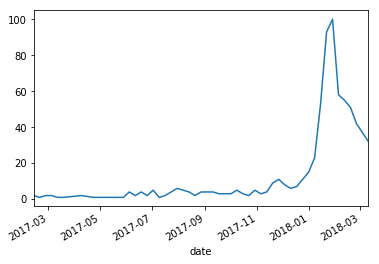

In [6]:
interest = interest_over_time_df[interest_over_time_df["Cherprang"] != 0]
interest["Cherprang"].plot()

## Related Topics 
ในขั้นตอนนี้เราจะดึง Related Topics ที่เกี่ยวกับเฌอปรางออกมา

In [7]:
related_topics = pytrends.related_topics()["เฌอ ปราง"]
print(related_topics)
del related_topics["mid"]

             mid                   title  \
0  /g/11cmcd2s26       บีเอ็นเคโฟร์ตีเอต   
1      /m/0f2jzn              พันทิป.คอม   
2       /m/0d5nn         คุกกี้เสี่ยงทาย   
3       /m/021mn                  คุกกี้   
4      /m/0k_jr_         เอเคบีโฟร์ตีเอต   
5     /m/05f7dx6             สถานีอารีย์   
6      /m/014ht3                คอสเพลย์   
7      /m/02yx0x                  กัปตัน   
8       /m/05_8m                  ไข่มุก   
9     /m/0w07jqs  ลัลณ์ลลิน เตจะสา เวศซ์   

                                       type  value  
0                                กลุ่มดนตรี     39  
1                                  เว็บไซต์      4  
2                                    คุกกี้      2  
3                                      เค้ก      2  
4                                กลุ่มดนตรี      2  
5  บริการการขนส่งในกรุงเทพมหานคร, ประเทศไทย      2  
6                                    หัวข้อ      1  
7                                    ฟุตบอล      1  
8                                    อ

In [8]:
related_topics

,title,type,value
0,บีเอ็นเคโฟร์ตีเอต,กลุ่มดนตรี,39
1,พันทิป.คอม,เว็บไซต์,4
2,คุกกี้เสี่ยงทาย,คุกกี้,2
3,คุกกี้,เค้ก,2
4,เอเคบีโฟร์ตีเอต,กลุ่มดนตรี,2
5,สถานีอารีย์,"บริการการขนส่งในกรุงเทพมหานคร, ประเทศไทย",2
6,คอสเพลย์,หัวข้อ,1
7,กัปตัน,ฟุตบอล,1
8,ไข่มุก,อัญมณี,1
9,ลัลณ์ลลิน เตจะสา เวศซ์,นักแสดง,0


เมื่อเราดูข้อที่ 0-4 จะพบว่ามีความสมเหตุสมผลอยู่ครับ แต่ในข้อ 5-9 นี้ขออธิบายรายข้อครับ
5. BTS อารีย์ คาดว่ามาจากการจับ Keyword จากนามสกุลอารีย์กุลของเฌอปราง ซึ่งแยกเป็น อารีย์ กับ กุล
6. Cosplay ใช่ครับ สมัยก่อนน้องเคยแต่ง Cosplay
7. กัปตัน เฌอเป็นกัปตันวง BNK48(แฟนคลับบางคนถึงเรียกเฌอปรางว่า แคปเฌอ ครับ)
8. ไข่มุก(คุณไข่) เป็น Member อีกคนครับ
9. ลัลณ์ลลิน เตจะสา เวศซ์(เฌอเบลล์) เคยถ่ายรูปคู่กับเฌอปรางครับ

## Related Queries
ในขั้นตอนนี้เราจะดู Related Query ที่เกี่ยวข้องกับเฌอปราง โดยเราจะดูทั้งว่าเป็น Keyword อะไร รวมถึงจำนวน

In [9]:
related_queries = pytrends.related_queries()["เฌอ ปราง"]['rising']

In [10]:
related_queries

,query,value
0,bnk48,1061650
1,bnk48 เฌอ ปราง,1041800
2,เฌอ ปราง ประวัติ,274050
3,เฌอ ปราง อารีย์ กุล,245650
4,เฌอ ปราง bnk,175900
5,bnk,175600
6,แฟน เฌอ ปราง,167900
7,เฌอ ปราง ig,167500
8,ประวัติ เฌอ ปราง bnk48,146850
9,ปั ญ bnk48,104500


จะพบว่ามีประเด็นคล้ายๆเดิม แต่มีประเด็นที่น่าสนใจดังนี้
1. เฌอปรางเกิดวันที่ 2 พฤษภาคม 2539 ครับ
2. แฟนเก่าเฌอปราง เนื่องจากเฌอปรางเคยให้สัมภาษณ์ก่อนเข้าวงว่าเคยมีแฟนแต่เลิกกันเพราะได้รับการคัดเลือกเข้า BNK48
3. น้องชายเฌอปรางชื่อ ฌอน ครับ 

## Compare with BNK48
สุดท้ายเราจะทำการเทียบระหว่าง Cherprang และ BNK48 โดยเมื่อดู Trend ทั้งสองจากกราฟพบว่าอาจมี Correlation กันสูงมาก เนื่องจากเมื่อคนคิดถึง BNK48 ชื่อที่ลอยมาแรกๆคือ เฌอปราง และ ปัญ

In [11]:
kw_BNK48 = ["BNK48"]
pytrends.build_payload(kw_BNK48)
interest_BNK = pytrends.interest_over_time()
interest_BNK = interest_BNK[interest_BNK["BNK48"] != 0]
interest_BNK = interest_BNK[interest_BNK.index.isin(pd.date_range("2017-01-01", "2018-03-16"))]

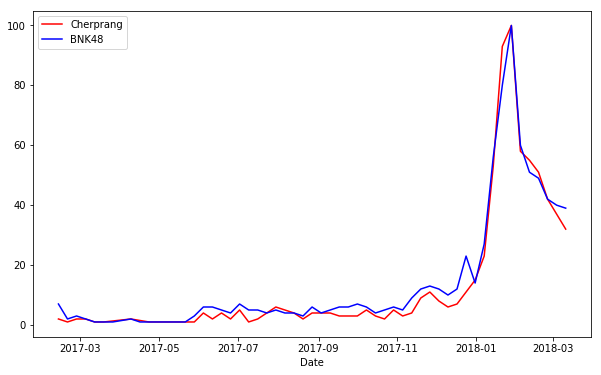

In [12]:
plt.figure(figsize=(10,6))
plt.plot(interest.index, interest["Cherprang"], 'r') # plotting t, a separately 
plt.plot(interest_BNK.index,interest_BNK["BNK48"], 'b')# plotting t, b separately 
plt.xlabel("Date")
plt.legend(["Cherprang","BNK48"])